# 1. 데이터 준비

In [1]:
import pandas as pd
path='/content/personality_dataset.csv'
df=pd.read_csv(path)
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


# 데이터 전처리

In [3]:
df.isna().sum()

,0
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


*  Time_spent_Alone - 중앙값 대체
*  Stage_fear - 삭제
*  Social_event_attendance - 중앙값 대체
*  Going_outside - 중앙값 대체
*  Drained_after_socializing - 최빈값
*  Friends_circle_size - 평균
*  Post_frequency - 중앙값



In [4]:
data_time_spend_alone = df['Time_spent_Alone'].median()
data_social_event_attendance = df['Social_event_attendance'].median()
data_going_outside = df['Going_outside'].median()
data_drained_after_socialii = df['Drained_after_socializing'].mode()[0]
data_friends_circle_size = df['Friends_circle_size'].mean()
data_post_frequency = df['Post_frequency'].median()

In [5]:
df['Time_spent_Alone'] = df['Time_spent_Alone'].fillna(data_time_spend_alone)
df['Social_event_attendance'] = df['Social_event_attendance'].fillna(data_social_event_attendance)
df['Going_outside'] = df['Going_outside'].fillna(data_going_outside)
df['Drained_after_socializing'] = df['Drained_after_socializing'].fillna(data_time_spend_alone)
df['Friends_circle_size'] = df['Friends_circle_size'].fillna(data_friends_circle_size)
df['Post_frequency'] = df['Post_frequency'].fillna(data_post_frequency)


df = df.drop('Stage_fear', axis=1)

In [6]:
df.isna().sum()

,0
Time_spent_Alone,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Social_event_attendance    2900 non-null   float64
 2   Going_outside              2900 non-null   float64
 3   Drained_after_socializing  2900 non-null   object 
 4   Friends_circle_size        2900 non-null   float64
 5   Post_frequency             2900 non-null   float64
 6   Personality                2900 non-null   object 
dtypes: float64(5), object(2)
memory usage: 158.7+ KB


In [8]:
df.columns = ['혼자_있는_시간', '사회적_모임_참여_빈도',
              '외출_빈도', '사교_후_피로감_여부', '친한친구_수',
              'SNS_게시빈도', '성격유형']

In [9]:
df.head(5)

,혼자_있는_시간,사회적_모임_참여_빈도,외출_빈도,사교_후_피로감_여부,친한친구_수,SNS_게시빈도,성격유형
0,4.0,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,9.0,4.0,No,8.0,5.0,Extrovert


# 시각화

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import *

In [11]:
# 한글 인코딩 문제 해결
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [16]:
df['SNS_게시빈도']

,SNS_게시빈도
0,5.0
1,3.0
2,2.0
3,8.0
4,5.0
...,...
2895,6.0
2896,9.0
2897,0.0
2898,0.0


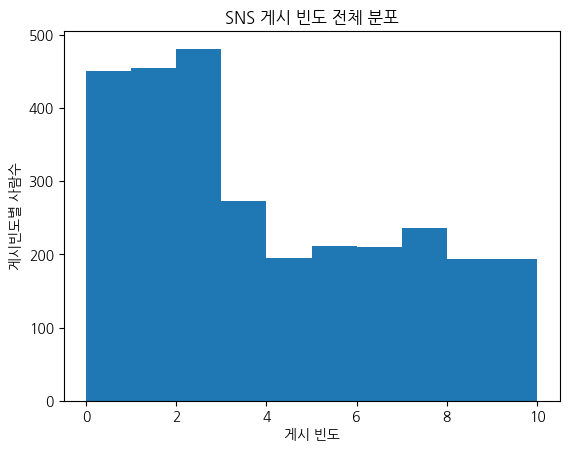

In [59]:
plt.hist(df['SNS_게시빈도'])
plt.title('SNS 게시 빈도 전체 분포')
plt.xlabel('게시 빈도')
plt.ylabel('게시빈도별 사람수')
plt.show()

In [12]:
# 평균 SNS 포스팅 수
post = df.groupby('성격유형')['SNS_게시빈도'].mean()
post

,SNS_게시빈도
성격유형,
Extrovert,5.580148
Introvert,1.405962


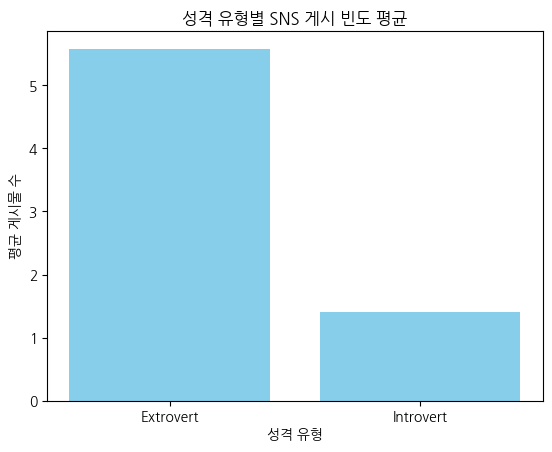

In [13]:
x = post.index
y = post.values

plt.bar(x, y, color = 'skyblue')
plt.title('성격 유형별 SNS 게시 빈도 평균')
plt.xlabel('성격 유형')
plt.ylabel('평균 게시물 수')
plt.show()

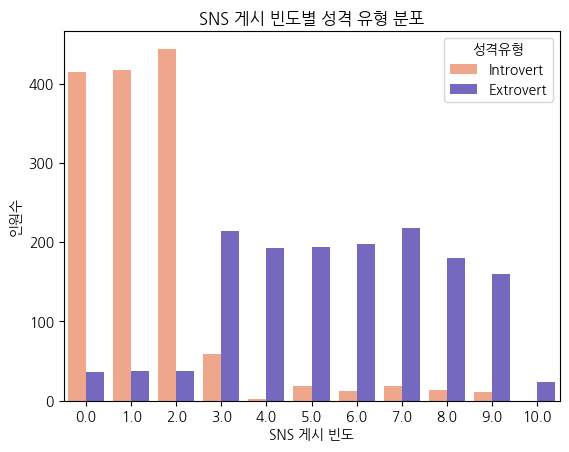

In [57]:
sns.countplot(x = 'SNS_게시빈도', hue = '성격유형', data = df,
              palette={
                  'Extrovert': '#6A5ACD',   # 보라
                  'Introvert': '#FFA07A'    # 살구
              })
plt.title('SNS 게시 빈도별 성격 유형 분포')
plt.xlabel('SNS 게시 빈도')
plt.ylabel('인원수')
plt.show()

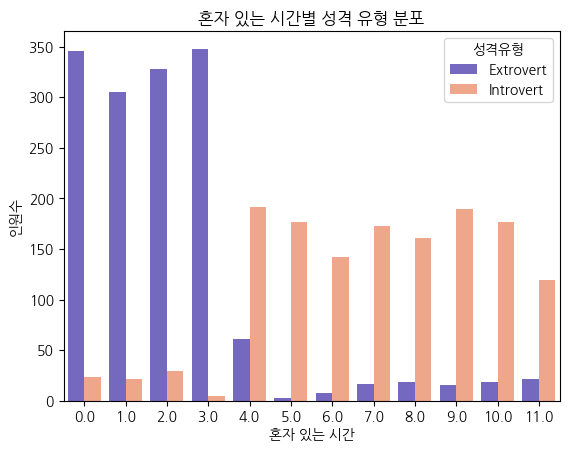

In [58]:
sns.countplot(x = '혼자_있는_시간', hue = '성격유형', data = df,
              palette={
                  'Extrovert': '#6A5ACD',   # 보라
                  'Introvert': '#FFA07A'    # 살구
              })
plt.title('혼자 있는 시간별 성격 유형 분포')
plt.xlabel('혼자 있는 시간')
plt.ylabel('인원수')
plt.show()

In [40]:
print(df['성격유형'].dtype)
print(df['SNS_게시빈도'].dtype)
# 성격유형이 외향성이면 1로 변경
df['성격유형_int'] = (df['성격유형'] == 'Extrovert').astype(int)
df['성격유형_int']

object
float64


,성격유형_int
0,1
1,0
2,0
3,1
4,1
...,...
2895,1
2896,1
2897,0
2898,0


In [48]:
x=df['SNS_게시빈도']
y=df['성격유형_int']
x, y

(0       5.0
 1       3.0
 2       2.0
 3       8.0
 4       5.0
        ... 
 2895    6.0
 2896    9.0
 2897    0.0
 2898    0.0
 2899    9.0
 Name: SNS_게시빈도, Length: 2900, dtype: float64,
 0       1
 1       0
 2       0
 3       1
 4       1
        ..
 2895    1
 2896    1
 2897    0
 2898    0
 2899    1
 Name: 성격유형_int, Length: 2900, dtype: int64)

In [55]:
# 회귀분석
# 독립변수, 종속변수
x=df[['SNS_게시빈도']]
y=df['성격유형_int']

# 학습시키기
model = LinearRegression()
model.fit(x, y) # 학습

# 예측하기
result = model.predict( [[5]] ) # 5개 게시
print(f'외향형일 확률 : {result}')

외향형일 확률 : [0.69436777]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
